# Estimating Causal Effect of Graduate Education on Income - Propensity Score-based Methods

DoWhy Library: https://py-why.github.io/dowhy/v0.8/ <br />
Data from: https://archive.ics.uci.edu/ml/datasets/census+income

### Import libraries

In [1]:
pip install dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.2 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.12
    Uninstalling Cython-3.0.12:
      Successfully uninstalled Cython-3.0.12


In [2]:
import pickle

import dowhy
from dowhy import CausalModel
import numpy as np

### Load data

In [3]:
import pandas as pd

# Load the pickle file
file_path = "/content/df_propensity_score.p"  # Replace with the correct file path
df = pd.read_pickle(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   age  hours-per-week  hasGraduateDegree  inRelationship  isWhite  isFemale  \
0   39              40                  0               0        1         0   
1   50              13                  0               1        1         0   
2   38              40                  0               0        1         0   
3   53              40                  0               1        0         0   
5   37              40                  1               0        1         1   

   greaterThan50k  
0               0  
1               0  
2               0  
3               0  
5               0  


In [ ]:
#df = pickle.load( open( "df_propensity_score.p", "rb" ) )

In [4]:
df.head()

,age,hours-per-week,hasGraduateDegree,inRelationship,isWhite,isFemale,greaterThan50k
0,39,40,0,0,1,0,0
1,50,13,0,1,1,0,0
2,38,40,0,0,1,0,0
3,53,40,0,1,0,0,0
5,37,40,1,0,1,1,0


### Estimating Causal Effects with DoWhy

#### Define causal model

In [5]:
model=CausalModel(
        data = df,
        treatment= "hasGraduateDegree",
        outcome= "greaterThan50k",
        common_causes="age",
        )

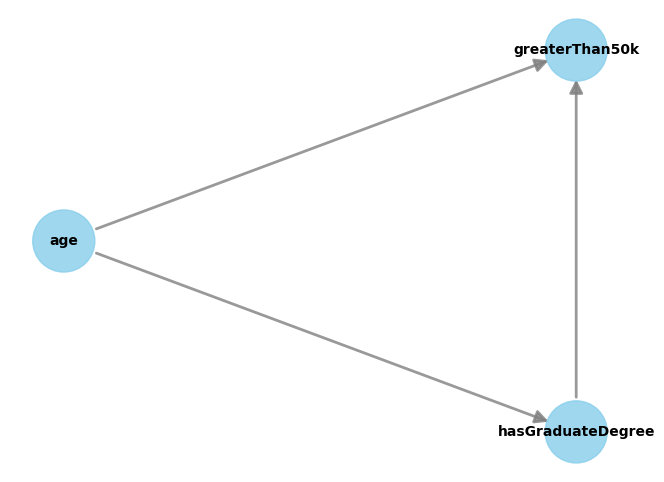

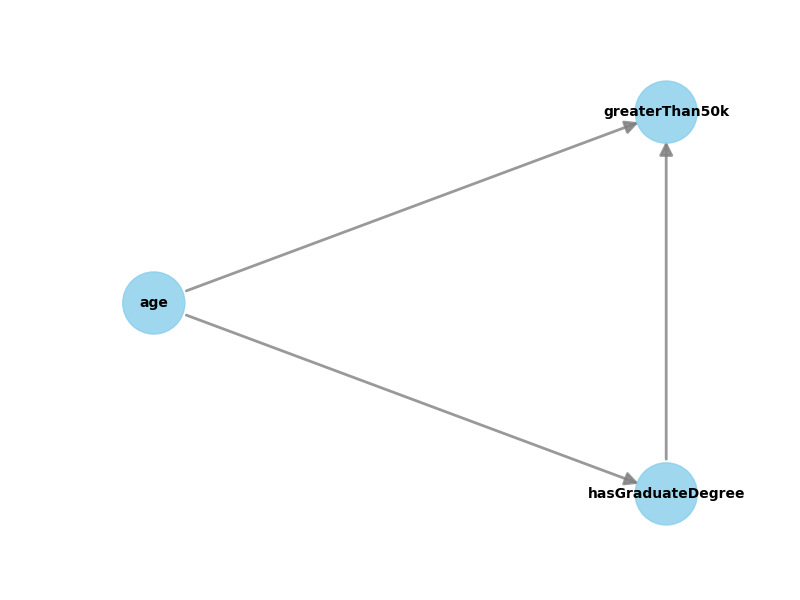

In [6]:
# View model
model.view_model()
from IPython.display import Image, display
Image(filename="causal_model.png")

#### Generate estimand i.e. recipe for calculating causal effect

In [7]:
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                 
────────────────────(E[greaterThan50k|age])
d[hasGraduateDegree]                       
Estimand assumption 1, Unconfoundedness: If U→{hasGraduateDegree} and U→greaterThan50k then P(greaterThan50k|hasGraduateDegree,age,U) = P(greaterThan50k|hasGraduateDegree,age)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



#### Compute causal effect using 3 different propensity score-based approaches

In [9]:
identified_estimand_experiment = model.identify_effect(proceed_when_unidentifiable=True)

# create list of names of the propensity score methods we want to use
ps_method_name_list = ["matching", "stratification", "weighting"]
# initalize dictionary to store estiamtes from each method and list to store ATEs
ps_estimate_dict = {}
ps_estimate_val_list = []

for ps_method_name in ps_method_name_list:
    ps_estimate = model.estimate_effect(identified_estimand_experiment,
                                    method_name="backdoor.propensity_score_" + ps_method_name,
                                    confidence_intervals=False,
                                    method_params={})
    # add estimate to dict and ATE to list
    ps_estimate_dict[ps_method_name] = ps_estimate
    ps_estimate_val_list.append(ps_estimate.value)

    print(ps_estimate)
    print("\n")

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                 
────────────────────(E[greaterThan50k|age])
d[hasGraduateDegree]                       
Estimand assumption 1, Unconfoundedness: If U→{hasGraduateDegree} and U→greaterThan50k then P(greaterThan50k|hasGraduateDegree,age,U) = P(greaterThan50k|hasGraduateDegree,age)

## Realized estimand
b: greaterThan50k~hasGraduateDegree+age
Target units: ate

## Estimate
Mean value: 0.052725402811107304



*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                 
────────────────────(E[greaterThan50k|age])
d[hasGraduateDegree]                       
Estimand assumption 1, Unconfoundedness: If U→{hasGraduateDegree} and U→greaterThan50k then P(greaterThan50k|hasGradu

### Compute mean effect across methods

In [10]:
np.mean(ps_estimate_val_list)

0.22627696445077183

In [11]:
# Save DataFrame as CSV
csv_filename = "data_propensity_score.csv"
df.to_csv(csv_filename, index=False)


#### For those who want to explore the estimates further

In [ ]:
ps_estimate_dict["matching"].__dir__()

['_data',
 '_treatment_name',
 '_outcome_name',
 'value',
 'target_estimand',
 'realized_estimand_expr',
 'control_value',
 'treatment_value',
 'conditional_estimates',
 'params',
 'propensity_scores',
 'effect_strength',
 'estimator',
 '__module__',
 '__doc__',
 '__init__',
 'add_estimator',
 'add_effect_strength',
 'add_params',
 'get_confidence_intervals',
 'get_standard_error',
 'test_stat_significance',
 'estimate_conditional_effects',
 'interpret',
 '__str__',
 '__dict__',
 '__weakref__',
 '__new__',
 '__repr__',
 '__hash__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__getstate__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']